In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [5]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier = planetary_computer.sign_inplace)

In [6]:
time_range = '2020-12-01/2020-12-31'
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(
    collections = ['landsat-c2-l2'],
    bbox = bbox,
    datetime = time_range
)

items = search.get_all_items()
len(items)

c:\Users\SABIO\anaconda3\envs\capstone\lib\site-packages\pystac_client\item_search.py:851: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


8

In [7]:
items

In [8]:
area_of_interes = {
    'type': 'Polygon',
    'coordinates': [
        [
            [-122.2751, 47.5469],
            [-121.9613, 47.9613],
            [-121.9613, 47.9613],
            [-122.2751, 47.9613],
            [-122.2751, 47.5469],
        ]
    ]
}

search = catalog.search(
    collections = ['landsat-c2-l2'],
    intersects = area_of_interes,
    datetime = time_range
)

In [10]:
import geopandas 

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs = "epsg:4326")
df.head()

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,eo:cloud_cover,proj:transform,view:off_nadir,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((-122.72549 48.50884, -120.29248 48.0...",30,2022-05-06T18:04:17.126358Z,10.5066/P9OGBGM6,2020-12-29T18:55:56.738265Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",100.00,"[30.0, 0.0, 471585.0, 0.0, -30.0, 5373315.0]",0,027,LC80460272020364LGN00,046,2,162.253231,L2SP,17.458298,100.00,02,T2
1,"POLYGON ((-124.52046 48.44245, -121.93932 48.0...",30,2022-05-06T17:25:29.626986Z,10.5066/P9C7I13B,2020-12-28T18:20:32.609164Z,landsat-7,32610,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],31.00,"[30.0, 0.0, 333885.0, 0.0, -30.0, 5368515.0]",0,027,LE70470272020363EDC00,047,2,152.689113,L2SP,14.678880,32.00,02,T1
2,"POLYGON ((-122.96802 48.44547, -120.39024 48.0...",30,2022-05-06T18:01:04.319403Z,10.5066/P9C7I13B,2020-12-21T18:14:50.812768Z,landsat-7,32610,"[7251, 8251]",Landsat Collection 2 Level-2,[etm+],25.00,"[30.0, 0.0, 452385.0, 0.0, -30.0, 5367315.0]",0,027,LE70460272020356EDC00,046,2,153.649177,L2SP,14.779612,24.00,02,T2
3,"POLYGON ((-124.27547 48.50831, -121.84167 48.0...",30,2022-05-06T17:46:22.246696Z,10.5066/P9OGBGM6,2020-12-20T19:02:09.878796Z,landsat-8,32610,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",100.00,"[30.0, 0.0, 353385.0, 0.0, -30.0, 5374215.0]",0,027,LC80470272020355LGN00,047,2,163.360118,L2SP,17.414441,100.00,02,T2
4,"POLYGON ((-122.72996 48.50858, -120.2969 48.07...",30,2022-05-06T18:04:16.935800Z,10.5066/P9OGBGM6,2020-12-13T18:56:00.096447Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",98.73,"[30.0, 0.0, 471285.0, 0.0, -30.0, 5373315.0]",0,027,LC80460272020348LGN00,046,2,164.126188,L2SP,17.799744,98.64,02,T2


In [11]:
selected_item = min(items, key = lambda item: item.properties['eo:cloud_cover'])
print(selected_item)

<Item id=LC08_L2SP_047027_20201204_02_T1>


In [12]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

In [14]:
import ollama

table = rich.table.Table("Asset Key", "Description", "Simplified Description")

for asset_key, asset in selected_item.assets.items():
    description = asset.title

    response = ollama.chat(
        model="llama3:8b",
        messages=[
            {"role": "system", "content": "You are an AI that explains asset descriptions in simple terms."},
            {"role": "user", "content": f"Please describe the asset with this description in simple terms: {description}"}
        ]
    )

    simplified_description = response['message']['content']
    table.add_row(asset_key, description, simplified_description)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                  ┃ Simplified Description                        ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band  │ Let me break it down for you!                 │
│                  │                                              │                                               │
│                  │                                              │ The "Surface Temperature Quality Assessment   │
│                  │                                              │ Band" is a way to measure how well the        │
│                  │                                              │ surface temperature of something (like a      │
│                  │                                              │ building or an object) is being recorded.     │
│                  │                                              │ It's like a report card for how accurate the  │
│                  │                                              │ temperature reading is.                       │
│                  │                                              │                                               │
│                  │                                              │ Imagine you're checking the outside           │
│                  │                                              │ temperature on a thermometer. You want to     │
│                  │                                              │ know if it's really hot or cold, and you want │
│                  │                                              │ to be sure that the thermometer is giving you │
│                  │                                              │ the right answer.                             │
│                  │                                              │                                               │
│                  │                                              │ The "Surface Temperature Quality Assessment   │
│                  │                                              │ Band" is like a special label that tells you  │
│                  │                                              │ if the thermometer (or whatever device) is    │
│                  │                                              │ giving you an accurate reading. It's a way to │
│                  │                                              │ grade how well the temperature measurement is │
│                  │                                              │ doing.                                        │
│                  │                                              │                                               │
│                  │                                              │ Here are some simple terms to summarize:      │
│                  │                                              │                                               │
│                  │                                              │ * The "Band" part refers to a range or        │
│                  │                                              │ category.                                     │
│                  │                                              │ * "Quality Assessment" means it's checking    │
│                  │                                              │ how good the temperature measurement is.      │
│                  │                                              │ * "Surface Temperature" means it's referring  │
│                  │                                              │ to the temperature of the surface (like the   │
│                  │                                              │ outside of something).                        │
│                  │                                    

In [15]:
def simplify_asset_description(asset):
    description = asset.title
    response = ollama.chat(
        model = "llama3:8b",
        messages=[
            {"role": "system", "content": "You are an AI that explains asset descriptions in simple terms."},
            {"role": "user", "content": f"Please describe the asset with this description in simple terms: {description}"}
        ]
    )
    return response['message']['content']

In [16]:
dictionary = {
    "Asset Key": [asset_key for asset_key, asset in selected_item.assets.items()],
    "Description": [asset.title for asset_key, asset in selected_item.assets.items()],
    "Simplified Description": [simplify_asset_description(asset) for asset_key, asset in selected_item.assets.items()]
}

df =pd.DataFrame(dictionary)
df

,Asset Key,Description,Simplified Description
0,qa,Surface Temperature Quality Assessment Band,Let me help you understand what this asset is ...
1,ang,Angle Coefficients File,"An ""Angle Coefficients File"" is a type of data..."
2,red,Red Band,"The ""Red Band""!\n\nIn simple terms, a Red Band..."
3,blue,Blue Band,"The ""Blue Band""!\n\nIn simple terms, the Blue ..."
4,drad,Downwelled Radiance Band,"The ""Downwelled Radiance Band"" is a type of as..."
5,emis,Emissivity Band,Imagine you're trying to take a good photo of ...
6,emsd,Emissivity Standard Deviation Band,"Let's break it down!\n\n""Emissivity"" refers to..."
7,trad,Thermal Radiance Band,"The ""Thermal Radiance Band"" is a type of asset..."
8,urad,Upwelled Radiance Band,"Let me break it down for you!\n\nThe ""Upwelled..."
9,atran,Atmospheric Transmittance Band,"The ""Atmospheric Transmittance Band"" is a fanc..."


In [17]:
df.to_csv('assets_table.csv', index = False)

In [18]:
print(df[df["Asset Key"] == 'qa']['Simplified Description'].iloc[0])

Let me help you understand what this asset is all about:

The "Surface Temperature Quality Assessment Band" is a tool used to measure and evaluate the quality of surface temperature data.

In simple terms, it's like a report card for how good or bad the temperature readings are. The band assesses the accuracy and reliability of the temperature measurements taken from surfaces, such as roads, buildings, or vehicles.

Think of it like a grading system:

* A good grade (e.g., A) means the temperature data is accurate and reliable.
* A lower grade (e.g., C or D) might indicate that there are some issues with the readings, like errors or inconsistencies.

By using this band, you can quickly identify which surface temperature measurements are trustworthy and which ones need to be rechecked or corrected.


In [1]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

asset = catalog.get_collection("gridmet").assets["zarr-abfs"]
asset

<Asset href=abfs://gridmet/gridmet.zarr>

In [4]:
import xarray.backends
print(xarray.backends.list_engines())

{'store': <StoreBackendEntrypoint>
  Open AbstractDataStore instances in Xarray
  Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.StoreBackendEntrypoint.html}


In [3]:
import xarray as xr

ds = xr.open_zarr(
    asset.href,
    storage_options=asset.extra_fields["xarray:storage_options"],
    **asset.extra_fields["xarray:open_kwargs"]
)
ds

<xarray.Dataset> Size: 597GB
Dimensions:                                    (time: 15341, lat: 585,
                                                lon: 1386, crs: 1)
Coordinates:
  * crs                                        (crs) uint16 2B 3
  * lat                                        (lat) float64 5kB 49.4 ... 25.07
  * lon                                        (lon) float64 11kB -124.8 ... ...
  * time                                       (time) datetime64[ns] 123kB 19...
Data variables:
    air_temperature                            (time, lat, lon) float32 50GB ...
    burning_index_g                            (time, lat, lon) float32 50GB ...
    dead_fuel_moisture_1000hr                  (time, lat, lon) float32 50GB ...
    dead_fuel_moisture_100hr                   (time, lat, lon) float32 50GB ...
    mean_vapor_pressure_deficit                (time, lat, lon) float32 50GB ...
    potential_evapotranspiration               (time, lat, lon) float32 50GB ...
    precipitation_amount                       (time, lat, lon) float32 50GB ...
    relative_humidity                          (time, lat, lon) float32 50GB ...
    specific_humidity                          (time, lat, lon) float32 50GB ...
    surface_downwelling_shortwave_flux_in_air  (time, lat, lon) float32 50GB ...
    wind_from_direction                        (time, lat, lon) float32 50GB ...
    wind_speed                                 (time, lat, lon) float32 50GB ...
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

Future exception was never retrieved
future: <Future finished exception=ClientConnectionError('Connection lost: [WinError 10054] An existing connection was forcibly closed by the remote host')>
Traceback (most recent call last):
  File "c:\Users\SABIO\anaconda3\envs\capstone\lib\asyncio\selector_events.py", line 854, in _read_ready__data_received
    data = self._sock.recv(self.max_size)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

The above exception was the direct cause of the following exception:

aiohttp.client_exceptions.ClientConnectionError: Connection lost: [WinError 10054] An existing connection was forcibly closed by the remote host
Future exception was never retrieved
future: <Future finished exception=ClientConnectionError('Connection lost: [WinError 10054] An existing connection was forcibly closed by the remote host')>
Traceback (most recent call last):
  File "c:\Users\SABIO\anaconda3\envs\capstone\lib\asyncio\sele

In [4]:
chunk = ds["air_temperature"][:30].compute()

In [13]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 15341, 'lat': 585, 'lon': 1386, 'crs': 1})

In [14]:
ds.coords

Coordinates:
  * crs      (crs) uint16 2B 3
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * time     (time) datetime64[ns] 123kB 1979-01-01 1979-01-02 ... 2020-12-31

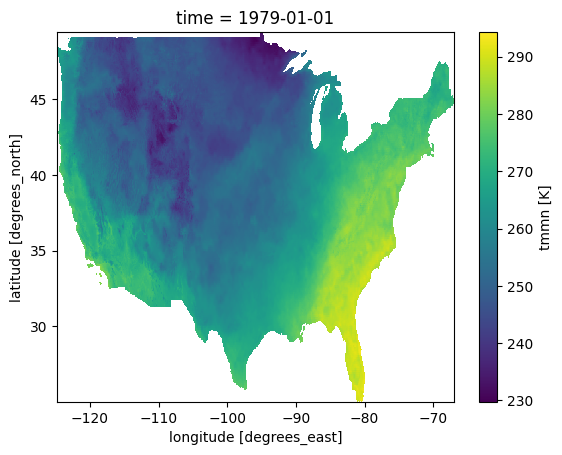

In [17]:
import matplotlib

ds.air_temperature.isel(time = 0).plot()

In [24]:
from rich.table import Table
from rich.console import Console

table = Table("Variable", "Long Name", "Units", "Description")

for name, var in ds.data_vars.items():
    long_name = var.attrs.get("long_name", "—")
    units = var.attrs.get("units", "—")
    description = var.attrs.get("description", "—")
    table.add_row(name, long_name, units, description)

console = Console()
console.print(table)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Variable                          ┃ Long Name ┃ Units                        ┃ Description                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ air_temperature                   │ tmmn      │ K                            │ Daily Minimum Temperature        │
│ burning_index_g                   │ bi        │ Unitless                     │ BI-G                             │
│ dead_fuel_moisture_1000hr         │ fm1000    │ Percent                      │ 1000 hour fuel moisture          │
│ dead_fuel_moisture_100hr          │ fm100     │ Percent                      │ 100 hour fuel moisture           │
│ mean_vapor_pressure_deficit       │ vpd       │ kPa                          │ mean vapor presure deficit       │
│ potential_evapotranspiration      │ pet       │ mm                           │ Daily reference                  │
│                                   │           │                              │ evapotranspiration (short grass) │
│ precipitation_amount              │ pr        │ mm                           │ Daily Accumulated Precipitation  │
│ relative_humidity                 │ rmin      │ %                            │ Daily Minimum Relative Humidity  │
│ specific_humidity                 │ sph       │ kg/kg                        │ Daily mean specific humidity     │
│ surface_downwelling_shortwave_fl… │ srad      │ W m-2                        │ Daily Mean downward shortwave    │
│                                   │           │                              │ radiation at surface             │
│ wind_from_direction               │ th        │ Degrees Clockwise from north │ Daily mean wind direction        │
│ wind_speed                        │ vs        │ m/s                          │ Daily Mean Wind Speed            │
└───────────────────────────────────┴───────────┴──────────────────────────────┴──────────────────────────────────┘

In [36]:
import pandas as pd
import ollama

rows = []

for var_name, var in ds.data_vars.items():
    long_name = var.attrs.get("long_name", "—")
    units = var.attrs.get("units", "—")
    
    # 🔁 Simplify the variable name, not the long name
    prompt = f"Explain what the variable '{var_name}' represents in simple terms. You can also use the units '{units}' or long name '{long_name}' for context."

    response = ollama.chat(
        model="llama3:8b",
        messages=[
            {"role": "system", "content": "You are an AI that explains scientific variable names in simple terms."},
            {"role": "user", "content": prompt}
        ]
    )

    simplified = response["message"]["content"]

    rows.append({
        "Variable": var_name,
        "Long Name": long_name,
        "Units": units,
        "Simplified Description": simplified
    })

# Save to CSV
df = pd.DataFrame(rows)
df.to_csv("variable_metadata.csv", index=False)

In [37]:
df = pd.read_csv('variable_metadata.csv')
df

,Variable,Long Name,Units,Simplified Description
0,air_temperature,tmmn,K,"The ""air_temperature"" variable! This is a pret..."
1,burning_index_g,bi,Unitless,"The ""burning_index_g"" variable!\n\nIn simple t..."
2,dead_fuel_moisture_1000hr,fm1000,Percent,"The variable ""dead_fuel_moisture_1000hr""!\n\nI..."
3,dead_fuel_moisture_100hr,fm100,Percent,'dead_fuel_moisture_100hr' is a fancy way to s...
4,mean_vapor_pressure_deficit,vpd,kPa,'Mean Vapor Pressure Deficit' (or just 'Vapor ...
5,potential_evapotranspiration,pet,mm,"So, ""potential evapotranspiration"" (or PET) is..."
6,precipitation_amount,pr,mm,"The variable ""precipitation_amount"" is a measu..."
7,relative_humidity,rmin,%,`relative_humidity` is a measure of how much m...
8,specific_humidity,sph,kg/kg,"The variable ""specific_humidity"" (or sph) is a..."
9,surface_downwelling_shortwave_flux_in_air,srad,W m-2,Let's break it down!\n\nThe variable `surface_...


In [38]:
print(df[df["Variable"] == 'air_temperature']['Simplified Description'].iloc[0])

The "air_temperature" variable! This is a pretty straightforward one.

"Air temperature" simply refers to how warm or cool the air is. It's measured in Kelvin (K), which is a scale that starts at absolute zero (-273°C) and goes up from there. So, if you saw a value like 22 K, it would be equivalent to -251°C, which is very cold!

In simpler terms, air temperature is like how hot or cool your day feels outside. For example:

* A warm day might have an air temperature of around 25-30°C (or 298-303 K).
* A chilly morning might have an air temperature of around 5-10°C (or 278-283 K).
* And a super cold winter night might have an air temperature as low as -20°C (or 253 K).

So, in short, "air_temperature" is just the measure of how hot or cold the air is!
